

# svm


In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('cell_samples.csv')

In [3]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df['Class'].unique()

array([2, 4], dtype=int64)

In [5]:
df.tail()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [6]:
df.shape

(699, 11)

In [7]:
df.size

7689

In [8]:
df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [9]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [10]:
df.isna().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [11]:
df.duplicated().unique()

array([False,  True])

In [12]:
mild_df=df[df['Class']==2][0:200]

In [13]:
evil_df=df[df['Class']==4][0:200]

<Axes: xlabel='Clump', ylabel='UnifSize'>

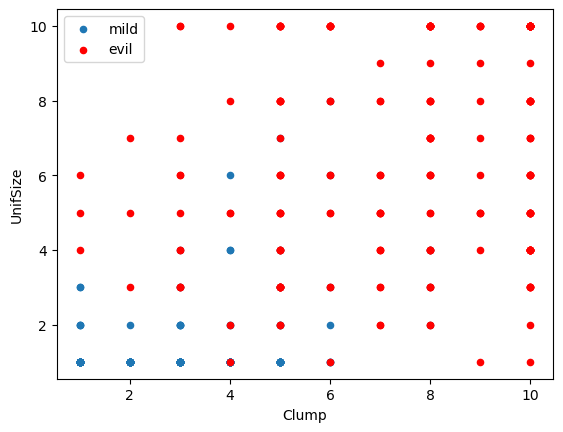

In [14]:
import matplotlib.pyplot as plt
axes=mild_df.plot(kind='scatter',x='Clump',y='UnifSize',label="mild")
evil_df.plot(kind='scatter',x='Clump',y='UnifSize',color='red',ax=axes,label="evil")


In [15]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [16]:
df1=df

In [17]:
df1

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [18]:
df1.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [19]:
df1=df1[pd.to_numeric(df1['BareNuc'],errors='coerce').notnull()]

In [20]:
df1[pd.to_numeric(df1['BareNuc'],errors='coerce').notnull()]

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [21]:
df1['BareNuc'].shape

(683,)

In [22]:
df1['BareNuc'].value_counts().sum()

683

In [23]:
df1.dtypes


ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [24]:
df1['BareNuc']=df1['BareNuc'].astype('int')

C:\Users\HP\AppData\Local\Temp\ipykernel_53428\524372817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['BareNuc']=df1['BareNuc'].astype('int')


In [25]:
df1["BareNuc"].unique()

array([ 1, 10,  2,  4,  3,  9,  7,  5,  8,  6])

In [26]:
df1

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [27]:
df1.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [28]:
df1['BareNuc'].notna().sum()

683

In [29]:
df1

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [30]:
df1.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [31]:
features_df=df1[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

In [32]:
X=np.asarray(features_df)

In [33]:
X

array([[ 5,  1,  1, ...,  3,  1,  1],
       [ 5,  4,  4, ...,  3,  2,  1],
       [ 3,  1,  1, ...,  3,  1,  1],
       ...,
       [ 5, 10, 10, ...,  8, 10,  2],
       [ 4,  8,  6, ..., 10,  6,  1],
       [ 4,  8,  8, ..., 10,  4,  1]], dtype=int64)

In [34]:
y=np.asarray(df1['Class'])

In [35]:
y

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2,
       4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4,

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
X_test.shape

(137, 9)

In [39]:
from sklearn import svm

In [40]:
classifier=svm.SVC(kernel='linear',gamma='auto',C=2)

In [41]:
classifier.fit(X_train,y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [42]:
y_predict=classifier.predict(X_test)

In [43]:
y_predict

array([4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2,
       4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 2, 2, 4, 2, 4, 4, 2, 4, 4, 2,
       2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2,
       4, 4, 4, 2, 2], dtype=int64)

In [44]:
pd.DataFrame({'y_test':y_test, 'y_pred':y_predict})

,y_test,y_pred
0,4,4
1,4,4
2,2,2
3,2,2
4,2,2
...,...,...
132,4,4
133,4,4
134,4,4
135,2,2


In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.9635036496350365

In [46]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)*100

85.05019642077696

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.95      0.99      0.97        79
           4       0.98      0.93      0.96        58

    accuracy                           0.96       137
   macro avg       0.97      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137

